In [2]:
# 环境准备
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🍷 本次任务：葡萄酒品种分类")
print("✅ 环境准备完成，所有工具就绪")

🍷 本次任务：葡萄酒品种分类
✅ 环境准备完成，所有工具就绪


In [3]:
# 从sklearn的datasets模块中加载葡萄酒数据集
# load_wine()函数返回一个包含数据、目标值、特征名称等信息的Bunch对象
wine = datasets.load_wine()

# 将葡萄酒数据转换为pandas DataFrame格式，便于数据分析和处理
# wine.data是特征数据，wine.feature_names是特征列的名称
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 在DataFrame中添加目标变量列，即葡萄酒的类别标签
# wine.target包含了每个样本对应的类别（0,1,2）
df['target'] = wine.target

# 打印数据集的基本信息概览
print("=== 数据集概览 ===")

# 输出数据集的维度（行数和列数）
print(f"📊 数据集形状: {df.shape}")

# 输出特征的数量（不包括目标变量）
print(f"🔍 特征数量: {len(wine.feature_names)}")

# 输出样本的总数量（行数）
print(f"🎯 样本数量: {len(df)}")

# 输出葡萄酒的类别名称列表
print(f"🍷 葡萄酒品类: {list(wine.target_names)}")

# 输出每个类别的样本数量分布，按类别索引排序
print(f"📋 类别分布:\n{df['target'].value_counts().sort_index()}")

# 打印特征说明部分
print("\n=== 特征说明 ===")
print("葡萄酒的13种化学成分指标：")

# 遍历所有特征名称，带序号显示
# enumerate的第二个参数1表示序号从1开始而不是0
for i, feature in enumerate(wine.feature_names, 1):
    # 格式化输出：2d表示两位数字，右对齐
    print(f"{i:2d}. {feature}")

# 打印类别说明部分
print("\n=== 类别说明 ===")

# 遍历所有类别名称，显示每个类别对应的数字标签和类别名称
for i, class_name in enumerate(wine.target_names):
    print(f"• {i}: {class_name}")

=== 数据集概览 ===
📊 数据集形状: (178, 14)
🔍 特征数量: 13
🎯 样本数量: 178
🍷 葡萄酒品类: ['class_0', 'class_1', 'class_2']
📋 类别分布:
target
0    59
1    71
2    48
Name: count, dtype: int64

=== 特征说明 ===
葡萄酒的13种化学成分指标：
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

=== 类别说明 ===
• 0: class_0
• 1: class_1
• 2: class_2



=== 数据质量检查 ===
缺失值数量: 0


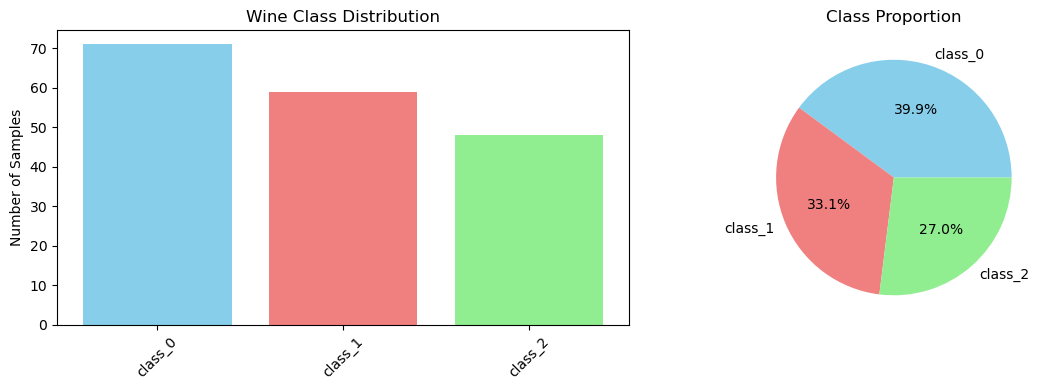

In [3]:
# 检查数据质量
print("\n=== 数据质量检查 ===")
# 计算整个DataFrame中缺失值的总数
# df.isnull() 返回布尔矩阵，.sum() 计算每列的缺失值，.sum() 再次求和得到总数
print(f"缺失值数量: {df.isnull().sum().sum()}")

# 目标变量分布可视化
# 创建一个图形窗口，设置尺寸为12英寸宽，4英寸高
plt.figure(figsize=(12, 4))

# 创建第一个子图（1行2列的第1个位置）
plt.subplot(1, 2, 1)
# 计算每个类别的样本数量
# df['target'] 选择目标变量列，.value_counts() 统计每个值的出现次数
class_counts = df['target'].value_counts()
# 绘制条形图：x轴为类别名称，y轴为样本数量，设置颜色
plt.bar(wine.target_names, class_counts, color=['skyblue', 'lightcoral', 'lightgreen'])
# 设置图表标题
plt.title('Wine Class Distribution')  
# 设置y轴标签
plt.ylabel('Number of Samples')        
# 旋转x轴标签45度，避免文字重叠
plt.xticks(rotation=45)

# 创建第二个子图（1行2列的第2个位置）
plt.subplot(1, 2, 2)
# 绘制饼图：数据为类别数量，标签为类别名称，显示百分比格式，设置颜色
plt.pie(class_counts, labels=wine.target_names, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral', 'lightgreen'])
# 设置饼图标题
plt.title('Class Proportion')          

# 自动调整子图参数，使图形元素不重叠
plt.tight_layout()
# 显示图形
plt.show()

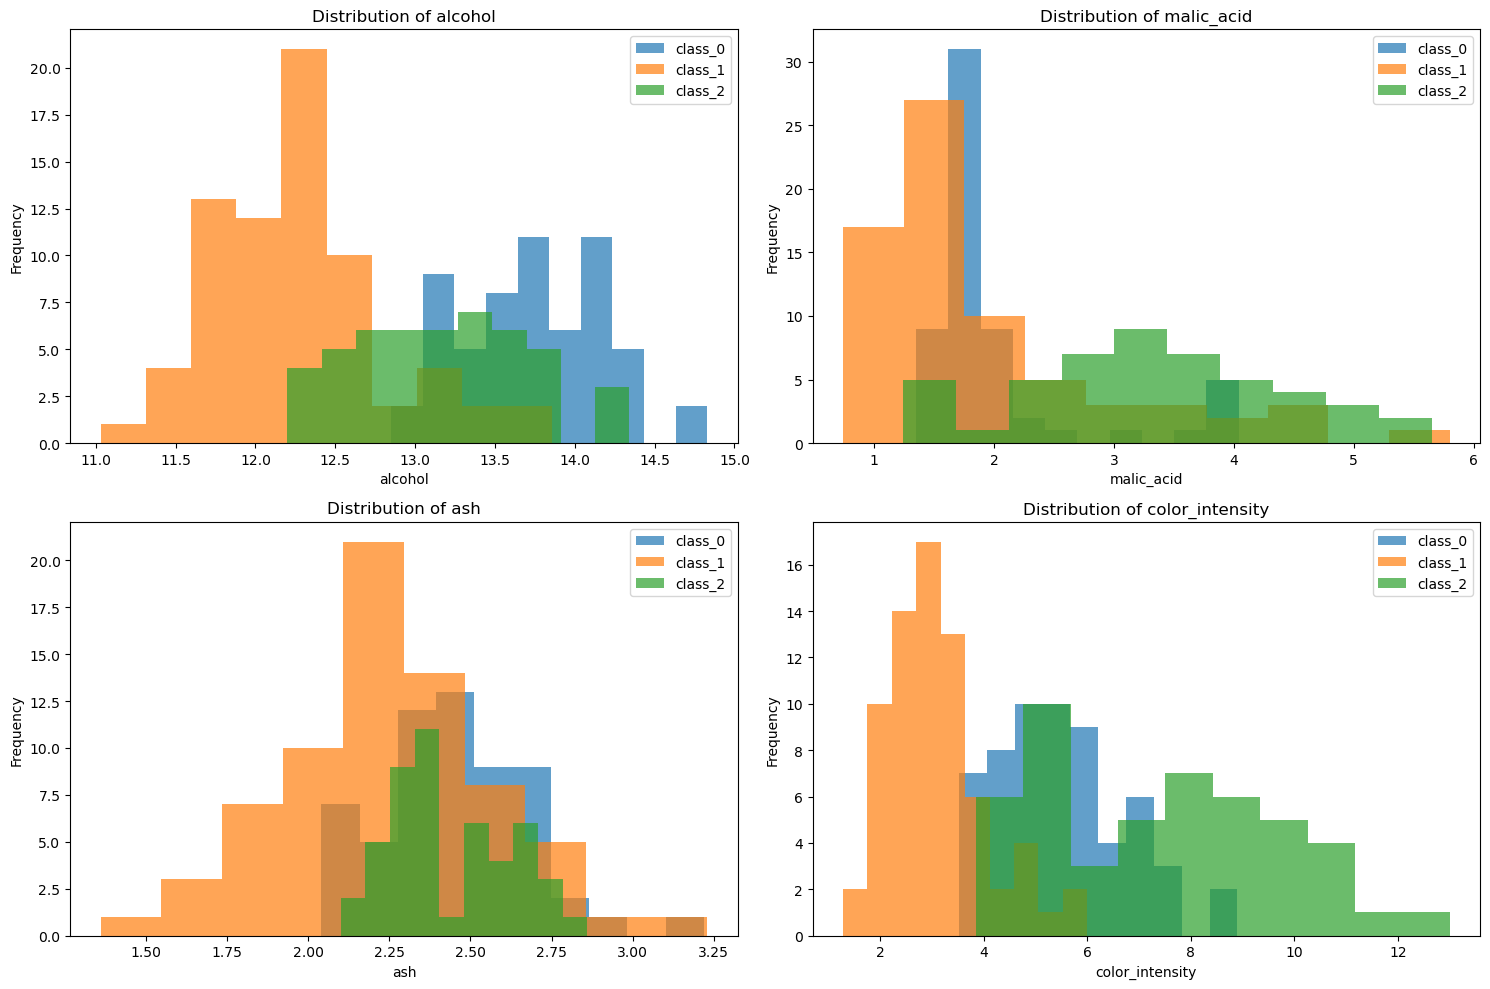

🔍 观察与思考：
• 哪些特征在不同品类间有明显差异？
• 这些特征能否有效区分不同品类的葡萄酒？
• 是否存在重叠区域，可能造成分类困难？


In [4]:
# 选择几个关键特征进行分析
# 定义要分析的四个关键特征：酒精含量、苹果酸、灰分、颜色强度
key_features = ['alcohol', 'malic_acid', 'ash', 'color_intensity']

# 创建图形窗口，设置尺寸为15英寸宽，10英寸高
plt.figure(figsize=(15, 10))

# 使用enumerate循环遍历每个关键特征
# i是子图索引（从1开始），feature是特征名称
for i, feature in enumerate(key_features, 1):
    # 创建2行2列的子图布局，当前绘制第i个子图
    plt.subplot(2, 2, i)
    
    # 为每个葡萄酒品类（0,1,2）分别绘制直方图
    for target_class in range(3):
        # 从DataFrame中筛选出当前类别的所有样本
        class_data = df[df['target'] == target_class]
        # 绘制当前特征在当前类别中的分布直方图
        # alpha=0.7 设置透明度为70%，便于重叠部分的观察
        # label 设置图例标签，使用类别名称
        plt.hist(class_data[feature], alpha=0.7, label=wine.target_names[target_class])
    
    # 设置x轴标签为当前特征名称
    plt.xlabel(feature)
    # 设置y轴标签为"Frequency"，表示样本出现的频率或数量
    plt.ylabel('Frequency')
    # 设置子图标题，显示当前特征的分布
    plt.title(f'Distribution of {feature}')
    # 显示图例，标识不同颜色的类别
    plt.legend()

# 自动调整子图之间的间距和边距，避免标签重叠
plt.tight_layout()
# 显示整个图形
plt.show()

print("🔍 观察与思考：")
print("• 哪些特征在不同品类间有明显差异？")
print("• 这些特征能否有效区分不同品类的葡萄酒？")
print("• 是否存在重叠区域，可能造成分类困难？")

In [7]:
# 准备特征和目标变量
X = df.drop('target', axis=1)  # 特征矩阵
y = df['target']              # 目标向量

print("=== 数据准备 ===")
print(f"特征矩阵形状: {X.shape}")
print(f"目标向量形状: {y.shape}")

# 数据划分：训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,        # 30%作为测试集
    random_state=42,      # 随机种子，保证结果可重现
    stratify=y           # 按类别分层抽样，保证分布一致
)

print(f"\n=== 数据划分结果 ===")
print(f"训练集: {X_train.shape[0]} 个样本")
print(f"测试集: {X_test.shape[0]} 个样本")
print(f"特征数: {X_train.shape[1]}")

print(f"\n训练集类别分布:")
print(y_train.value_counts().sort_index())
print(f"测试集类别分布:")
print(y_test.value_counts().sort_index())

=== 数据准备 ===
特征矩阵形状: (178, 13)
目标向量形状: (178,)

=== 数据划分结果 ===
训练集: 124 个样本
测试集: 54 个样本
特征数: 13

训练集类别分布:
target
0    41
1    50
2    33
Name: count, dtype: int64
测试集类别分布:
target
0    18
1    21
2    15
Name: count, dtype: int64


In [6]:
# 导入标准化工具
# StandardScaler 会将数据标准化为均值为0，标准差为1的分布
from sklearn.preprocessing import StandardScaler

# 数据标准化 - 解决数据尺度不一致问题
# 逻辑回归对特征的尺度敏感，如果特征尺度差异大，会导致收敛困难
scaler = StandardScaler()
# 对训练集进行拟合和转换：计算均值和标准差，然后进行标准化
X_train_scaled = scaler.fit_transform(X_train)
# 对测试集进行转换：使用训练集计算的均值和标准差进行标准化
# 注意：测试集不能重新拟合，必须使用训练集的参数
X_test_scaled = scaler.transform(X_test)

# 创建空字典用于存储模型训练结果
results = {}
print("=== 模型训练开始 ===")

# 初始化逻辑回归模型
# random_state=42 设置随机种子，保证结果可重现
# max_iter=1000 设置最大迭代次数，确保模型能够收敛
model = LogisticRegression(random_state=42, max_iter=1000)

# 使用标准化后的训练数据训练逻辑回归模型
model.fit(X_train_scaled, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = model.predict(X_train_scaled)
# 使用训练好的模型对测试集进行预测
y_test_pred = model.predict(X_test_scaled)

# 计算评估指标
# 计算训练集准确率：正确预测的训练样本比例
train_accuracy = accuracy_score(y_train, y_train_pred)
# 计算测试集准确率：正确预测的测试样本比例
test_accuracy = accuracy_score(y_test, y_test_pred)

# 存储结果到字典中
results = {
    'train_accuracy': train_accuracy,  # 训练集准确率
    'test_accuracy': test_accuracy,    # 测试集准确率
    'model': model,                    # 训练好的模型对象
    'y_test_pred': y_test_pred         # 测试集的预测结果
}

# 输出训练结果
print(f"训练集准确率: {train_accuracy:.4f}")  # 格式化输出，保留4位小数
print(f"测试集准确率: {test_accuracy:.4f}")
print(f"详细分类报告:")
# 输出详细的分类报告，包括精确率、召回率、F1-score等指标
# target_names=wine.target_names 使用实际的类别名称而不是数字标签
print(classification_report(y_test, y_test_pred, target_names=wine.target_names))

=== 模型训练开始 ===
训练集准确率: 1.0000
测试集准确率: 0.9815
详细分类报告:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()